# Лабораторная работа по модулю “Математика и статистика в Python”

<pre>
ФИО: Никифоров Владимир
</pre>

1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis
5. Визуализировать несколько взаимосвязей между переменными
6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.
7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from pprint import pprint
import scipy.stats.mstats as mstats
from scipy.stats import pearsonr

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('../data/auto.csv')

In [3]:
# посмотрим на данные
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Описание данных:

![Info](../img/cars_info.png)

In [4]:
# рассмотрим данные: размер датасета
print(df.shape)
# информацию по датасету - типы и наличие NULL в столбцах
print(df.info())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           

Сразу видим, что пустых значений в столбцах нет - все стобцы заполнены 205 непустыми значениями, что также можно проверить следующим образом:

In [5]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


## Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
# бОльшую часть статистик мы можем получить простейшей стандартной операцией описания датасета
# А именно: среднее (mean), медиану (50%), мин/макс, сред. отклонение (std)
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Посчитаем моду
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# альтернативный вариант через mstats.mode подойдет для числовых переменных
df_mode = pd.DataFrame(data=list(df.describe().columns), columns=['column_name'])
df_mode['mode'] = list(mstats.mode(df[list(df.describe().columns)], axis=0).mode.data[0])
df_mode

,column_name,mode
0,symboling,0.00
1,normalized-losses,161.00
2,wheel-base,94.50
3,length,157.30
4,width,63.80
5,height,50.80
6,curb-weight,2385.00
7,engine-size,92.00
8,bore,3.62
9,stroke,3.40


## Рассчитать и визуализировать корреляционную матрицу для переменных

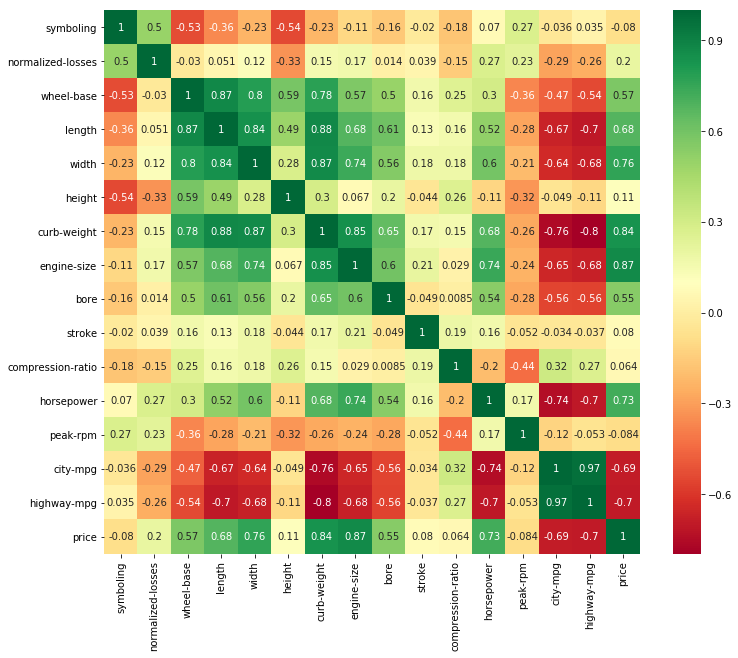

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

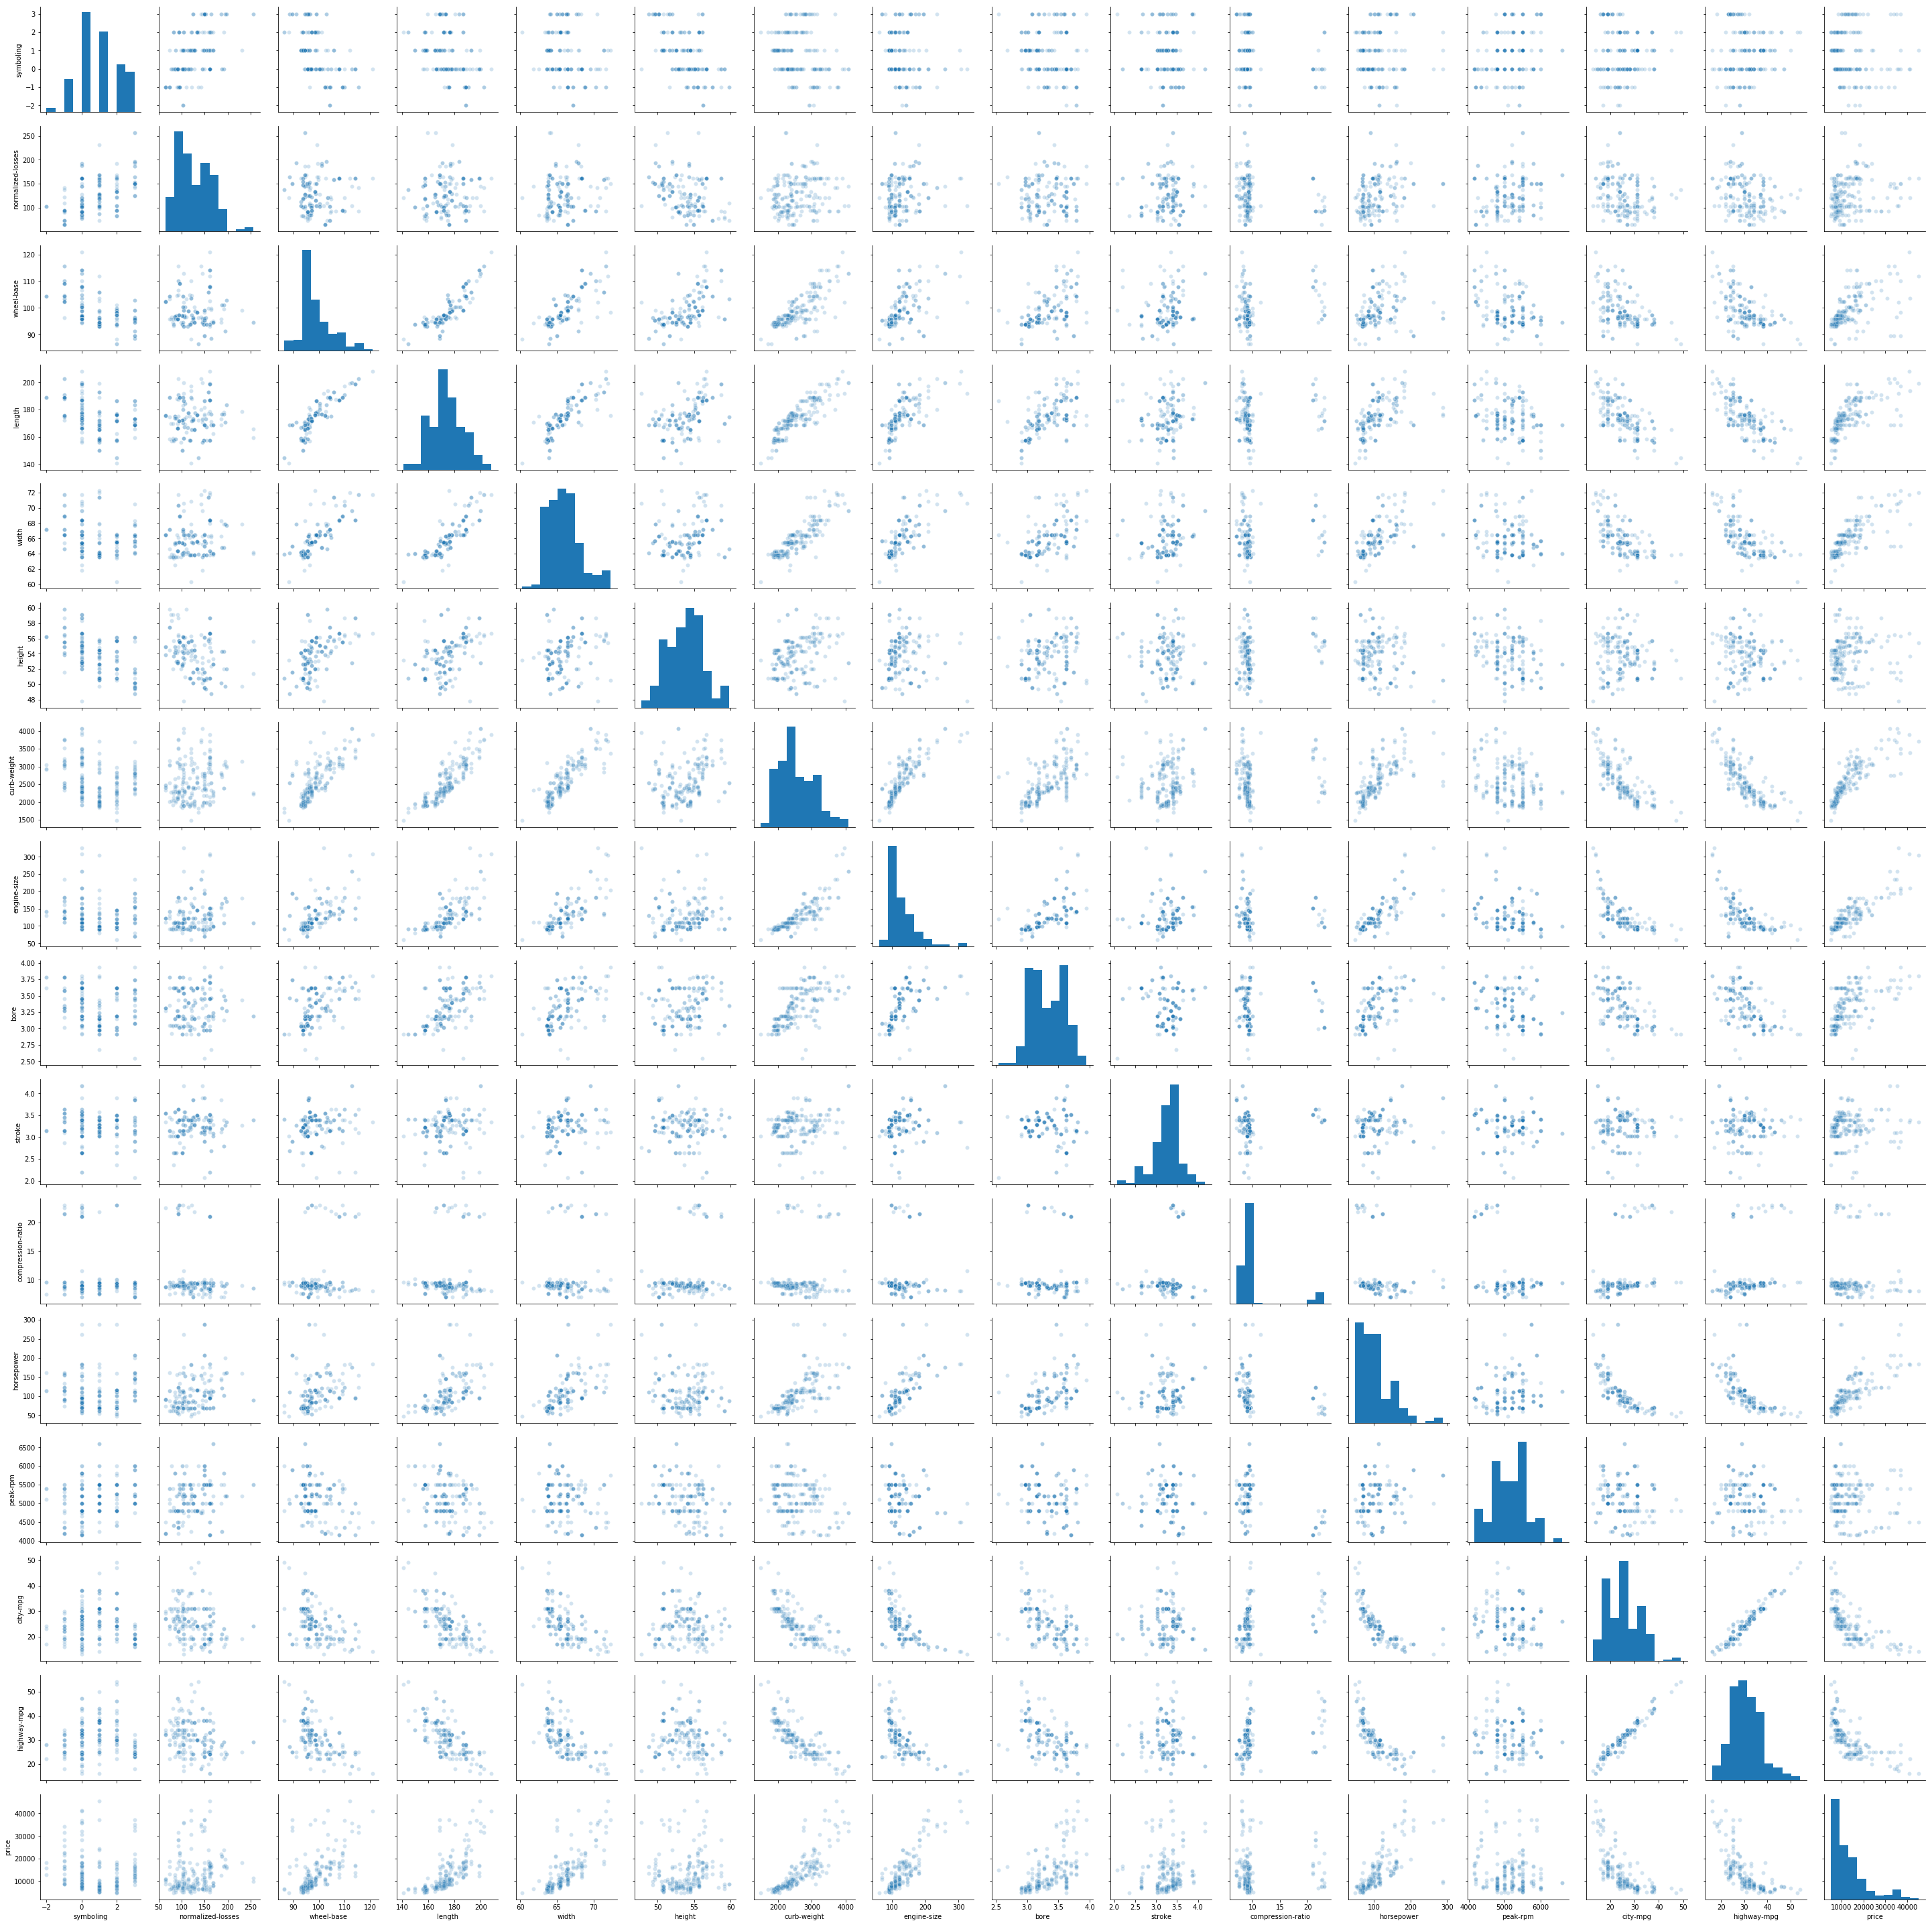

In [10]:
sns.pairplot(data=df,plot_kws={'alpha':0.2},palette='hot');

В целом, просматриваются переменные с положительной корреляцией и переменные с большой дисперсией. Посмотрим примеры дальше.

## Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

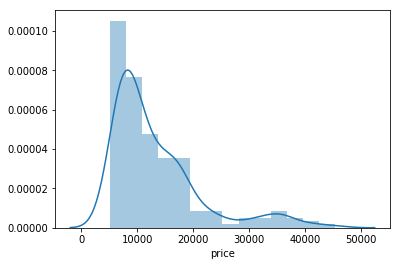

In [11]:
sns.distplot(df['price']);

На визуализации переменной Price мы видим логнормальное распределение с сигмой примерно 3/2, сдвинутое к значению 5118 (минимальное значение).

In [12]:
print(f"Показатели skewness и kurtosis для переменной Price равны {round(df['price'].skew(),4)} и {round(df.price.kurtosis(),4)} соответственно.")

Показатели skewness и kurtosis для переменной Price равны 1.7664 и 2.9486 соответственно.


Оба положительных показателя skewness и kurtosis позволяют видеть в этом распределении также нормальное распределение с перекошенностью вправо и выраженным положительным эксцессом.

## Визуализировать несколько взаимосвязей между переменными

In [13]:
# Для примера рассмотрим переменные с сильной корреляцией - коэффициент Пирсона по модулю больше 0,7
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.7) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all')

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
wheel-base,NaN,0.874587,0.795144,0.776386,NaN,NaN,NaN,NaN,NaN
length,0.874587,NaN,0.841118,0.877728,NaN,NaN,NaN,-0.704662,NaN
width,0.795144,0.841118,NaN,0.867032,0.735433,NaN,NaN,NaN,0.764977
curb-weight,0.776386,0.877728,0.867032,NaN,0.850594,NaN,-0.757414,-0.797465,0.835657
engine-size,NaN,NaN,0.735433,0.850594,NaN,0.742119,NaN,NaN,0.870751
horsepower,NaN,NaN,NaN,NaN,0.742119,NaN,-0.744246,NaN,0.725481
city-mpg,NaN,NaN,NaN,-0.757414,NaN,-0.744246,NaN,0.971337,NaN
highway-mpg,NaN,-0.704662,NaN,-0.797465,NaN,NaN,0.971337,NaN,NaN
price,NaN,NaN,0.764977,0.835657,0.870751,0.725481,NaN,NaN,NaN


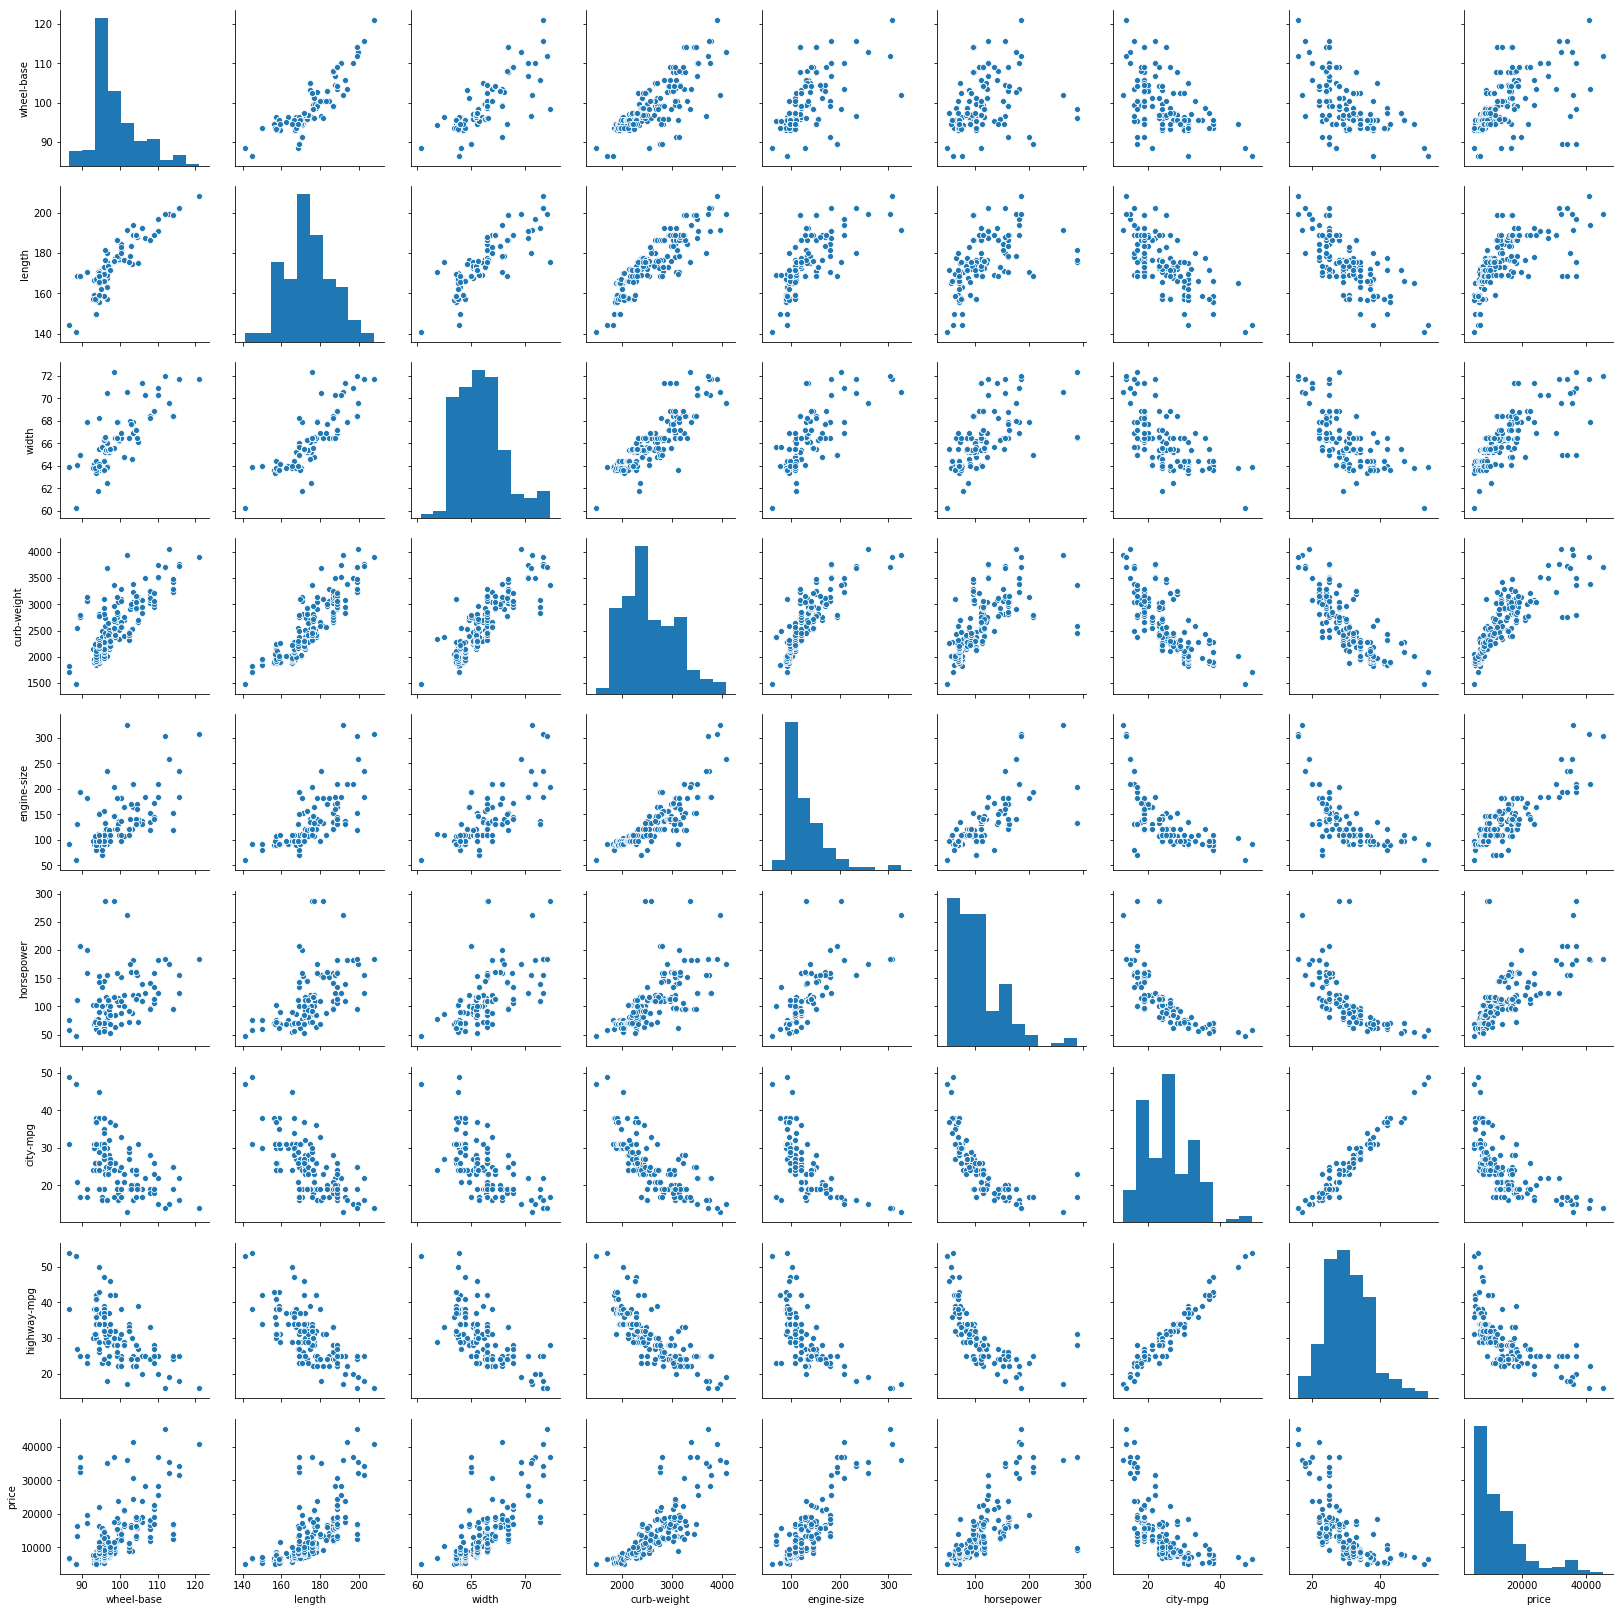

In [14]:
sns.pairplot(data=df[df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.7) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all').columns]);

На графиках отражена как сильная положительная, так и сильная отрицательная корреляции между переменными.

Конечно, интереснее всего посмотреть на взаимосвязь количества лошадей на цену (не зря же у нас налог на роскошь ввели :) )

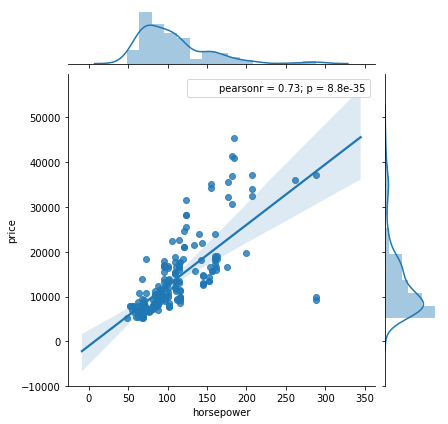

In [15]:
sns.jointplot(data=df,y='price',x='horsepower',kind='reg',stat_func=pearsonr);

Выводы: можно увидеть, что чем больше лошадей под капотом, тем более вероятно, что машина будет стоить дороже. Но есть интересные исключения.

## Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [16]:
# Отнормируем числовые переменные датасета с сильной корреляцией
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
cols = df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.7) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all').columns
np_scaled = min_max_scaler.fit_transform(df[cols])
df_norm = pd.DataFrame(np_scaled, columns=cols)
df_norm.head()

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
0,-0.883382,-0.173134,-0.366667,-0.177657,-0.479245,-0.475000,-0.555556,-0.421053,-0.584082
1,-0.883382,-0.173134,-0.366667,-0.177657,-0.479245,-0.475000,-0.555556,-0.421053,-0.434884
2,-0.539359,-0.101493,-0.133333,0.035687,-0.313208,-0.116667,-0.666667,-0.473684,-0.434884
3,-0.230321,0.059701,-0.016667,-0.341350,-0.637736,-0.550000,-0.388889,-0.263158,-0.561491
4,-0.253644,0.059701,0.016667,0.036462,-0.433962,-0.441667,-0.722222,-0.684211,-0.387717


Расход топлива - отличается ли средний расход топлива по городу от среднего расхода по трассе?

In [17]:
sts.ttest_ind(df_norm['city-mpg'], df_norm['highway-mpg'])

Ttest_indResult(statistic=-2.7202092104745734, pvalue=0.006802954290554462)

p-value меньше уровня значимости, а это означает, что мы можем отвергнуть нулевую гипотезу об одинаковых средних, а значит средний расход топлива в городе и на трассе отличается.

In [18]:
df_norm = pd.concat([df_norm,df['make']], axis=1)
df_norm.head()

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,make
0,-0.883382,-0.173134,-0.366667,-0.177657,-0.479245,-0.475000,-0.555556,-0.421053,-0.584082,alfa-romero
1,-0.883382,-0.173134,-0.366667,-0.177657,-0.479245,-0.475000,-0.555556,-0.421053,-0.434884,alfa-romero
2,-0.539359,-0.101493,-0.133333,0.035687,-0.313208,-0.116667,-0.666667,-0.473684,-0.434884,alfa-romero
3,-0.230321,0.059701,-0.016667,-0.341350,-0.637736,-0.550000,-0.388889,-0.263158,-0.561491,audi
4,-0.253644,0.059701,0.016667,0.036462,-0.433962,-0.441667,-0.722222,-0.684211,-0.387717,audi


In [19]:
df_alfa = df_norm[df_norm['make'] == "alfa-romero"]
df_audi = df_norm[df_norm['make'] == 'audi']

Объем двигателя - отличается ли средний объем двигателя у ауди и альфа-ромео?

In [21]:
sts.ttest_ind(df_alfa['engine-size'], df_audi['engine-size'])

Ttest_indResult(statistic=0.9012872395906305, pvalue=0.39375956125121125)

Получили высокое p-value, выше 0.05 => мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны.

Аналогичная ситуация и по мощности автомобилей двух марок:

In [23]:
sts.ttest_ind(df_alfa['horsepower'], df_audi['horsepower'])

Ttest_indResult(statistic=0.2853379686724827, pvalue=0.7826333409929858)

Получили высокое p-value, выше 0.05 => мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны.